# The Seinfeld!
Arguably the greatest sitcom ever made and certainly my most favourite show ever.

[From Wikipedia](https://en.wikipedia.org/wiki/Seinfeld):
> Seinfeld is an American live-action sitcom created by Larry David and Jerry Seinfeld for NBC. Set predominantly in an apartment building in Manhattan's Upper West Side in New York City, the show features a handful of Jerry Seinfeld's (as a fictionalized version of himself) friends and acquaintances, including best friend George Costanza (Jason Alexander), friend and former girlfriend Elaine Benes (Julia Louis-Dreyfus), and neighbor across the hall Cosmo Kramer (Michael Richards). 

This quick description just scratches the surface of what Seinfeld was and still is; an iconic creation that is frequently ranked by publications such as 'Rolling Stone' and 'Entertainment Weekly' as one of the best comedies ever made and voted by the 'Writers Guild of America' the No. 2 Best Written TV Series of All Time. Seinfeld has become a cultural touchstone and deeply embedded piece of the cultural zeitgeist spawning words like 'close-talker', catch-phrases like "It's gold, Jerry. Gold!", the truly unique "Elaine Dance" and even a new holiday "Festivus"! Seinfeld had an immeasurable impact on the pop-culture landscape but in this notebook, I plan to use Exploratory Data Analysis and Deep Learning on the complete scripts from the show's entire run  and do just a little bit of measuring.



# The Business Recommendations

## The Brand
'Seinfeld' is global brand, [From Elasticity](https://goelastic.com/three-immutable-branding-lessons-that-seinfeld-taught-us/)
>Seinfeld still runs on 90 percent of TV markets across the country and ranks among American adults’ top five favorite shows. It’s earned more than $3 billion (with a “b”) after its network run ended. And every weeknight, no fewer than one million people tune in to watch reruns.


This year there have been multiple 30th anniversay celebrations and shows such as the ['Seinfeld Experience'](https://deadline.com/2019/06/seinfeld-experience-sets-real-and-spectacular-opening-this-fall-in-new-york-1202638328/) 
>Part retail shop and part immersive show promotion, the ticketed attraction in the city’s Gramercy neighborhood will operate seven days a week. Tickets through February 2020<br>
>(Deadline.com)

There is huge scope for machine learning based products to utilise the Seinfeld name and brand. This notebook will introduce a learning model based on the identifying the writing of Larry David. This basic idea can be extrapolated and built from to create nuerous writing and languaged based tie ins to the Seinfeld brand. For instance a "write like Larry David" teaching tool fro aspiring sit-com writers or a Seinfeld based adventure game   

## The Fraud Prevention
Seinfeld is a specific example designed for fun and to  be eye-catching but fun and eye-catching can be great introductions techniques to a much more serious subject. More broadly, this type of application can be generalizsed to the field of fraud prevention. Training a deep learning model on writing samples from an individual the same way that has been done here could be used as part of a fraud prevention device designed to detect imposters in things like business and email correspondence

### The CEO Fraud
CEO fraud is a perfect candidate for this kind of implementation. 
>CEO Fraud is a scam in which cybercriminals spoof company email accounts and impersonate executives to try and fool an employee in accounting or HR into executing unauthorized wire transfers, or sending out confidential tax information.<br>
[source](https://www.knowbe4.com/ceo-fraud)

The FBI esitmated the cost of impersonation fraud in the US alone at over $12 Billion in 2018 ([source](https://www.ic3.gov/media/2018/180712.aspx)) and this kind of scam is only becoming increasingly prevalent at an alarming rate:
> ...impersonation attacks increased almost 70 percent (67%) in comparison to the results in last year’s report – with 73 percent of those organizations impacted by impersonation attacks having experienced a direct loss.<br>
[source](https://www.globenewswire.com/news-release/2019/05/29/1854599/0/en/Mimecast-Global-Research-Finds-Loss-of-Customers-Finances-and-Data-Due-to-Rise-in-Impersonation-Attacks.html)

By training a similar model to the one created in this notebook on business correspondence provided by the company, the writing styles of C-Level executives could be identified and tool created that would flag correspondence by potential impersonators for further scrutiny.



The dataset can be found on kaggle [here](https://www.kaggle.com/thec03u5/seinfeld-chronicles) and consists of 2 tables:
- episode_info.csv
- scripts.csv

<b>episode_info</b> consists of meta-data for each episode, including the episode name and number original air-date

<b>scripts</b> consists of the dialogue spoken by each character and the character that spoke it.

Let's begin by loading the episode_info and scripts tables into a pandas DataFrame and learning a little more about the show!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
episodes=pd.read_csv('episode_info.csv',index_col='Unnamed: 0')
episodes.head()

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,1.0,"Good News, Bad News","July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E01
1,1.0,1.0,The Stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,The Robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,Male Unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,The Stock Tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04


In [2]:
scripts=pd.read_csv('scripts.csv',index_col='Unnamed: 0')
scripts.head()

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,GEORGE,Are you through?,1.0,S01E01,1.0
3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0


<b>Seinfeld Trivia!</b>
The original pilot of Seinfeld (originally entitled 'The Seinfeld Chronicles') 'Good News, Bad News' was not picked up! NBC did eventually order 4 additional episodes that make up the first season, a record for smallest episode order in US TV history!
    
We can see this reflected in the data head dispalyed above. There are 2 entries both labelled Season 1, Episode 1 i.e S01E01
To prevent any confusion later on, the pilot episode 'Good News, Bad News' will be re-numbered Season 1, Episode 0 - S01E00

# The Episodes

In [3]:
episodes['EpisodeNo'][0]=0
episodes['SEID'][0]='S01E00'
episodes.head()

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,0.0,"Good News, Bad News","July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,1.0,1.0,The Stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,The Robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,Male Unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,The Stock Tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04


In [4]:
scripts['SEID'][:211]='S01E00'
scripts['EpisodeNo'][:211]=0
scripts[210:212]

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Character,Dialogue,EpisodeNo,SEID,Season
210,JERRY,"I swear, I have absolutely no idea what women ...",0.0,S01E00,1.0
211,JERRY,"So, Im on line at the supermarket. Two women i...",1.0,S01E01,1.0


The episode split is here between these two monologues by Jerry

So lets confirm some basic info about the show for anyone who doesn't know

In [5]:
print('Seinfeld ran for',len(episodes.Season.unique()),'seasons consisting of',len(episodes.index), 'episodes')
print('The pilot episode aired on',episodes['AirDate'][0], 'but the first full season began on',episodes['AirDate'][1])
print('The final episode aired on',episodes['AirDate'][173])

Seinfeld ran for 9 seasons consisting of 174 episodes
The pilot episode aired on July 5, 1989 but the first full season began on May 31, 1990
The final episode aired on May 14, 1998


With 174 episodes and 9 seasons, on average each season we would expect to consist of 174/9=19.33 episodes, is this the case?

In [6]:
season_size=episodes.groupby('Season').size()
season_size

Season
1.0     5
2.0    12
3.0    23
4.0    24
5.0    21
6.0    22
7.0    24
8.0    22
9.0    21
dtype: int64

Nope. As I stated before the first season consists of the pilot plus 4 episodes but the second season is also shorter at just 12 episodes. But is this exactly true?

In [7]:
season_lastep= episodes.groupby('Season').max()['EpisodeNo']
season_lastep

Season
1.0     4.0
2.0    12.0
3.0    23.0
4.0    24.0
5.0    22.0
6.0    24.0
7.0    24.0
8.0    22.0
9.0    23.0
Name: EpisodeNo, dtype: float64

These episode numbers are different! The final episode in each season does not match up with the length of each season.


In [8]:
for i in range(1,10):
    if season_size[i]!=season_lastep[i]:
        print('Season {} has inconsistent season length and last episode number; inconsistency = {}'.format(i,season_lastep[i]-season_size[i]))


Season 1 has inconsistent season length and last episode number; inconsistency = -1.0
Season 5 has inconsistent season length and last episode number; inconsistency = 1.0
Season 6 has inconsistent season length and last episode number; inconsistency = 2.0
Season 9 has inconsistent season length and last episode number; inconsistency = 2.0


Season 1, as we know, has been given an episode 0 so this accounts for the difference but what about the other three seasons?

In [9]:
episodes.iloc[81:83][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
81,5.0,18.0,The Raincoats
82,5.0,20.0,The Fire


There's no episdoe 19!
Its ok though, season 2 episode 18 'The Raincoats' is actually a 2 part episode:<br>
https://en.wikipedia.org/wiki/The_Raincoats_(Seinfeld)


In [10]:
episodes.iloc[97:99][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
97,6.0,13.0,The Scofflaw
98,6.0,16.0,The Beard


In season 6 there are 2 numbers missing, episodes 14 and 15.
Again this is a 2 part episode but in this case the episode has been completely cut from the dataset as it is a clip episode and contains little or no new data. <br>
https://en.wikipedia.org/wiki/The_Highlights_of_100

In [11]:
episodes.iloc[172:][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
172,9.0,20.0,The Puerto Rican Day
173,9.0,23.0,The Finale


Episodes 21 and 22 are missing. Again this is a clip episode that has been cut from the dataset already<br>
https://en.wikipedia.org/wiki/The_Chronicle_(Seinfeld)<br>
Episode 23 'The Finale' is also a double episode.

I *know* there are other 2 part episodes, but these appear to have been treated differently to 'The Raincoats' in season 5

In [12]:
episodes.iloc[119:130][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
119,7.0,13.0,The Seven
120,7.0,14.0,The Cadillac (1)
121,7.0,15.0,The Cadillac (2)
122,7.0,16.0,The Shower Head
123,7.0,17.0,The Doll
124,7.0,18.0,The Friars Club (a.k.a. The Gypsies)
125,7.0,19.0,The Wig Master
126,7.0,20.0,The Calzone
127,7.0,21.0,The Bottle Deposit (1)
128,7.0,22.0,The Bottle Deposit (2)


In [13]:
episodes[episodes['Title'].str.contains("1")]

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
33,3.0,17.0,The Boyfriend (1),"February 12, 1992",Larry David and Larry Levin,Tom Cherones,S03E17
40,4.0,1.0,The Trip (1),"August 12, 1992",Larry Charles,Tom Cherones,S04E01
44,4.0,5.0,The Wallet (1),"September 23, 1992",Larry David,Tom Cherones,S04E05
62,4.0,23.0,The Pilot (1),"May 20, 1993",Larry David,Tom Cherones,S04E23
120,7.0,14.0,The Cadillac (1),"February 8, 1996","Larry David, Jerry Seinfeld",Andy Ackerman,S07E14
127,7.0,21.0,The Bottle Deposit (1),"May 2, 1996","Gregg Kavet, Andy Robin",Andy Ackerman,S07E21


In [14]:
episodes[episodes['Title'].str.contains("2")]

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
34,3.0,18.0,The Boyfriend (2),"February 12, 1992",Larry David and Larry Levin,Tom Cherones,S03E18
41,4.0,2.0,The Trip (2),"August 19, 1992",Larry Charles,Tom Cherones,S04E02
45,4.0,6.0,The Watch (2),"September 30, 1992",Larry David,Tom Cherones,S04E06
63,4.0,24.0,The Pilot (2),"May 20, 1993",Larry David,Tom Cherones,S04E24
121,7.0,15.0,The Cadillac (2),"February 8, 1996","Larry David, Jerry Seinfeld",Andy Ackerman,S07E15
128,7.0,22.0,The Bottle Deposit (2),"May 2, 1996","Gregg Kavet, Andy Robin",Andy Ackerman,S07E22


Most of the double episodes have been marked with a '1' and '2' but not 'The Raincoats' or 'The Finale' which are considered as though they were single episodes

In [15]:
for i in episodes['Title']:
    if i.startswith('The')==False:
        print(i)

Good News, Bad News
Male Unbonding


There are just 2 episodes that do not have a title starting with the word 'The' both of these are in the first season. After this it became something of convention for the writers

# The Writers

In [16]:
names=[]
for i in episodes['Writers'].unique():
    names.append(i.replace(' and ',',').rstrip('.').split(',')) #break up the writing credits 
names
#set of unique writers' names
writers=set(([item.strip() for sublist in names for item in sublist]))
print(writers)

{'Carol Leifer', "Steve O'Donnell", 'David Mandel', 'Gregg Kavet', 'Bob Shaw', 'Jerry Seinfeld', 'Sam Kass', 'Don McEnery', 'Steve Koren', 'Fred Stoller', "Dan O'Keefe", 'Steve Skrovan', 'Tom Gammill', 'Alec Berg', 'Steve Lookner', 'Lawrence H. Levy', 'Greg Daniels', 'Ron Hague', 'Bruce Kirschbaum', 'Jennifer Crittenden', 'Jill Franklyn', 'Jon Hayman', 'Larry Levin', 'Elaine Pope', 'Andy Robin', 'Charlie Rubin', 'Jeff Schaffer', 'Darin Henry', 'Larry Charles', 'Peter Mehlman', 'Larry Charles / Story By Marc Jaffe', 'Bill Masters', 'Tom Leopold', 'Marjorie Gross', 'Bruce Eric Kaplan', 'Larry David', 'Buck Dancer (Larry David pseudonym)', 'Max Pross', 'Spike Feresten', 'Matt Goldman', 'Andy Cowan'}


Marc Jaffe has only a story credit and Buck Dancer is a psuedonym for Larry David, these entries will be removed and Buck Dancer replaced with Larry David

In [17]:
#edits on credits
episodes=episodes.replace('Larry Charles / Story By Marc Jaffe','Larry Charles')
episodes=episodes.replace('Lawrence H. Levy, Buck Dancer (Larry David pseudonym)','Lawrence H. Levy, Larry David')
#re-split
names=[]
for i in episodes['Writers'].unique():
    names.append(i.replace(' and ',',').rstrip('.').split(','))

#corrected set of unique writers' names
writers=set(([item.strip() for sublist in names for item in sublist]))




In [18]:
#Construct dataframe for stats for individual writers
writers_df=pd.DataFrame([writers])
writers_df=writers_df.transpose()
writers_df.columns=['Writer']
for writer in writers:
    writers_df['Writer']=writers
#number of episodes writtend per season per writer
for season in range(1,10):
    for writer in writers:
        ep_counter=0
        for ep in episodes.loc[episodes['Season']==season].Writers:
            if writer in ep:
                ep_counter+=1
 #               print(writer,ep_counter) sanity check
        writers_df.set_value(writers_df.loc[writers_df['Writer']==writer].index,'Season '+str(season),ep_counter)

#Sum of season credits for total
writers_df['Total']=writers_df['Season 1']+writers_df['Season 2']+writers_df['Season 3']+writers_df['Season 4']+writers_df['Season 5']+writers_df['Season 6']+writers_df['Season 7']+writers_df['Season 8']+writers_df['Season 9']
    
writers_df.head()

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,Writer,Season 1,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8,Season 9,Total
0,Carol Leifer,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,6.0
1,Steve O'Donnell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
2,David Mandel,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0,9.0
3,Gregg Kavet,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,3.0,11.0
4,Bob Shaw,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


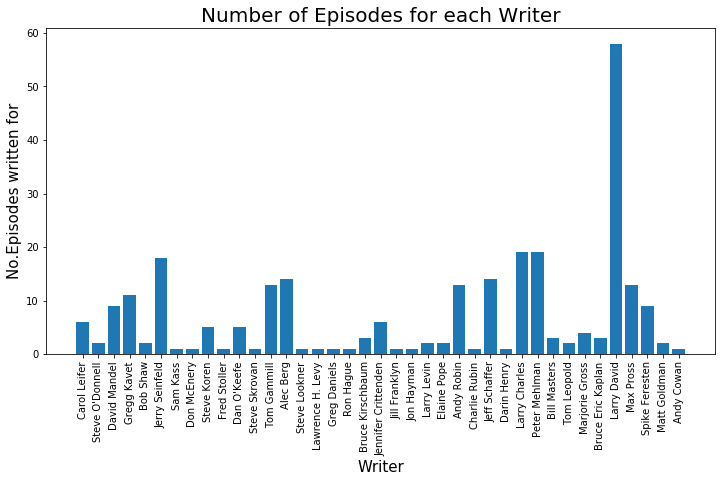

,Writer,Season 1,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8,Season 9,Total
34,Larry David,4.0,8.0,14.0,11.0,8.0,6.0,6.0,0.0,1.0,58.0
29,Peter Mehlman,0.0,1.0,2.0,4.0,3.0,2.0,3.0,3.0,1.0,19.0
28,Larry Charles,0.0,3.0,4.0,9.0,3.0,0.0,0.0,0.0,0.0,19.0
5,Jerry Seinfeld,4.0,6.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,18.0
13,Alec Berg,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,5.0,14.0


In [19]:
plt.figure(figsize=(12,6))
plt.bar(writers_df.Writer,writers_df.Total)
plt.xlabel('Writer',size=15)
plt.ylabel('No.Episodes written for',size=15)
plt.title('Number of Episodes for each Writer',size=20)
plt.xticks(rotation=90)
plt.show()
writers_df.sort_values('Total',ascending=False).head()

Jerry Seinfeld and Larry David noticable were much more active in writing for the earlier seasons and not at all in the final seasons. Larry David left the show completely after season 7 and only returned for the final episode 'The Finale'
Larry David is clearly the most prolific of the writers, writing for 58 episodes nearly a third of the shows 174 episode run.
The two next most credited writers Peter Mehlman and Larry Charles wrote on 19 episodes each. 
Interestingly, Peter Mehlman wrote for every season after season 1 but Larry Charles wrote only from season 2 to Season 5
Jerry Seinfeld himself, the shows co-creator and star, rounds out the top of the writers with 18 credits most of which are written alongside Larry David, Jerry too ceased to write for the show after season 7.


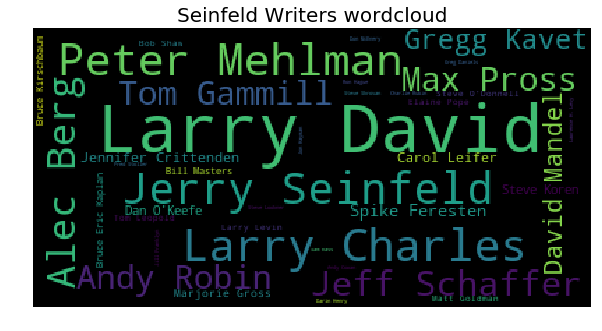

In [20]:
import wordcloud as wc

wordcloud=wc.WordCloud()
wordcloud.fit_words(dict(zip(writers_df.Writer.values,writers_df.Total.values)))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Seinfeld Writers wordcloud',size=20)
plt.show()

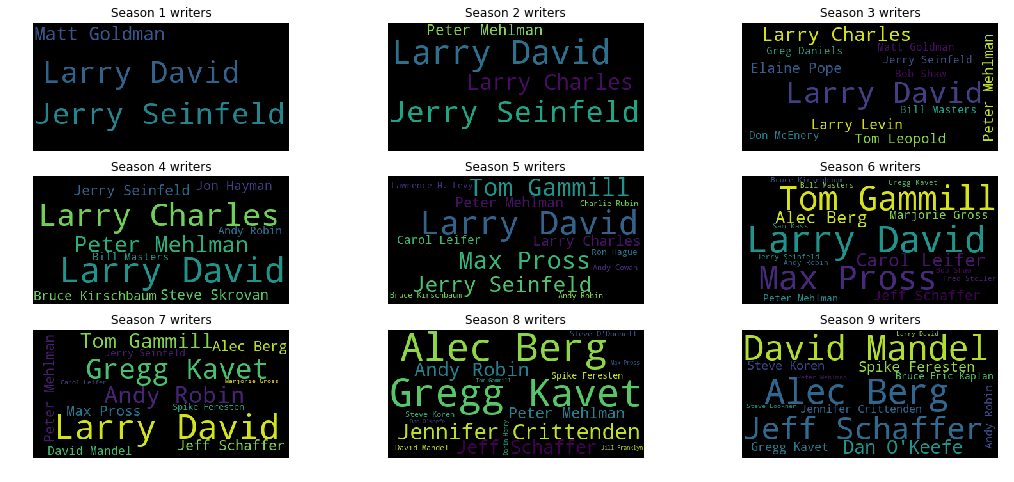

In [21]:
plt.figure(figsize=(18,8))
#construct wordcloud for each season - wordclouds cannot have zero-values!
for i in range(1,10):
    wordcloud.fit_words(dict(zip(writers_df.loc[writers_df['Season '+str(i)]!=0].Writer.values,writers_df.loc[writers_df['Season '+str(i)]!=0]['Season '+str(i)].values)))
    plt.subplot(3,3,i)
    plt.imshow(wordcloud)
    plt.title('Season '+str(i)+' writers')
    plt.axis('off')


# The Larry David

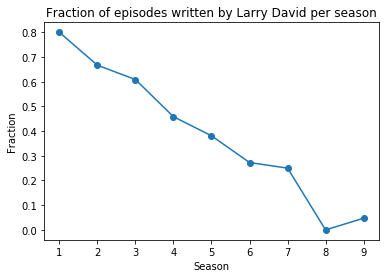

In [22]:
#larry David's contribution to writing over the seasons
larry_frac=[]
for a,b in zip(season_size.values,writers_df.loc[writers_df.Writer=='Larry David'].transpose()[1:10].values):
    larry_frac.append(b/a)

plt.plot(range(1,10),larry_frac,marker='o')
plt.title("Fraction of episodes written by Larry David per season")
plt.ylabel('Fraction')
plt.xlabel('Season')
plt.show()

# The Genders

Writers' gender's guessed using the python library gender-guesser https://pypi.org/project/gender-guesser/

In [23]:
#gender breakdown of all writers
import gender_guesser.detector as gender
gend = gender.Detector()
writer_gender=[]
for writer in writers:
    writer_gender.append(gend.get_gender(writer.split()[0],country='usa'))
writers_df['gender']=writer_gender
writers_df.gender.value_counts()

male             27
mostly_male       6
female            4
mostly_female     1
unknown           1
Name: gender, dtype: int64

In [24]:
#gender breakdown of all credits
gender_credits=dict()
for gender in writers_df.gender.unique():
    gender_credits[gender]=0
    for writer in writers_df.iterrows():
        if writer[1][-1]==gender:
            gender_credits[gender]+=writer[1][-2]
gender_credits

{'mostly_female': 6.0,
 'male': 195.0,
 'mostly_male': 47.0,
 'female': 13.0,
 'unknown': 9.0}

In [25]:
#insert feature in writers dataframe for guessed gender
episodes['has_fem']=0
for ep in episodes.iterrows():
    names=(ep[1][4].replace(' and ',',').split(','))
    for name in names:
        if 'fe' in gend.get_gender(name.split()[0],country='usa'):
            episodes['has_fem'][ep[0]]=1
print(episodes.loc[episodes.has_fem==1]['has_fem'].sum(), 'episodes from the shows run of', len(episodes.index), 'episodeshave at least one female writer'  ) 


C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


17 episodes from the shows run of 174 episodeshave at least one female writer


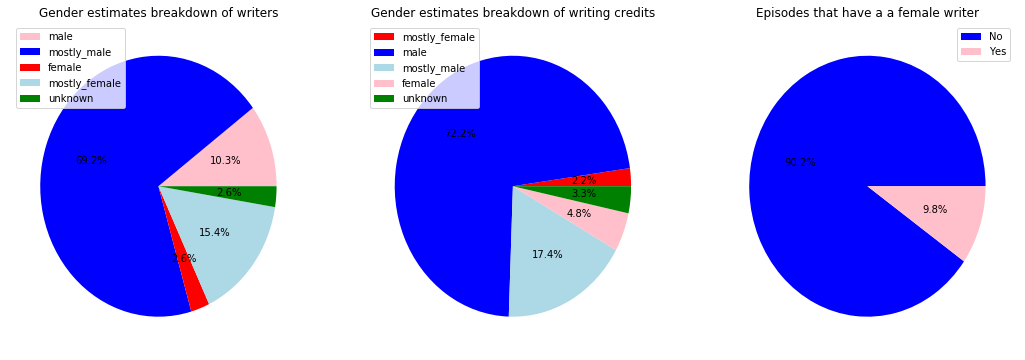

In [39]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.pie(writers_df.gender.value_counts().sort_index(),autopct = "%.1f%%", colors = ['pink','blue', 'red','lightblue','green'])
plt.legend(writers_df.gender.value_counts().index,loc='upper left')
plt.title('Gender estimates breakdown of writers')

plt.subplot(1,3,2)
plt.pie(gender_credits.values(),autopct = "%.1f%%", colors = ['red','blue', 'lightblue','pink','green'])
plt.legend(gender_credits.keys(),loc='upper left')
plt.title('Gender estimates breakdown of writing credits')

plt.subplot(1,3,3)
plt.pie(episodes.has_fem.value_counts(),autopct = "%.1f%%", colors = ['blue' ,'pink'])
plt.legend(['No','Yes'])
plt.title('Episodes that have a a female writer')

plt.show()


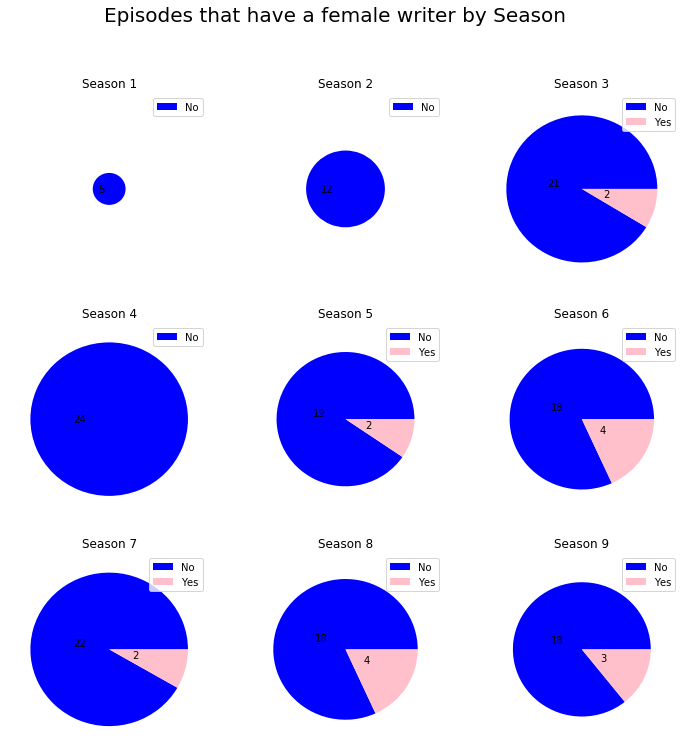

In [27]:
#pie charts sized by season length
plt.figure(figsize=(12,12,))
plt.suptitle('Episodes that have a female writer by Season',size=20)
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.pie(episodes.loc[episodes.Season==i].has_fem.value_counts(),
            labels = episodes.loc[episodes.Season==i].has_fem.value_counts(), 
            labeldistance =0.3, 
#             textprops={'size':12},
            colors = ['blue' ,'pink'],
            radius=(len(episodes.loc[episodes.Season==i].has_fem)/24))
    plt.legend(['No','Yes'])
    plt.title('Season '+str(i))
plt.show()

The first season to have a female writer is Season 3, the seasons with the highest female contributions to writing are Seasons 6 and 8 with 4 of each of the 22 episodes having at least one female writer

# The Dialogue

In [29]:
scripts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54616 entries, 0 to 54615
Data columns (total 5 columns):
Character    54616 non-null object
Dialogue     54606 non-null object
EpisodeNo    54616 non-null float64
SEID         54616 non-null object
Season       54616 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


10 rows contain no actual dialogue to be dropped from dataset<br>
All dialogue and character names set to lowercase

In [30]:
scripts=scripts.dropna()
scripts.Character=scripts.Character.map(lambda x:x.lower())
scripts.Dialogue=scripts.Dialogue.map(lambda x:x.lower())

'Character' feature to designate the character delivering the line also sometimes includes a stage direction or or other descriptor in parentheses. These need to be removed and just the character name maintained, an example is shown below:

In [31]:
scripts.Character.value_counts()[-1:]

gx    1
Name: Character, dtype: int64

In [32]:
character_stripped=[]
for i in scripts.Character:
    a=i.split(' (')
    character_stripped.append(a[0])
scripts['character_stripped']=character_stripped


scripts.loc[scripts.Character=="jerry (clearly creeped out by having to shake poppie's hand)"]

,Character,Dialogue,EpisodeNo,SEID,Season,character_stripped
27017,jerry (clearly creeped out by having to shake ...,"hello, poppie. this is elaine.",5.0,S06E05,6.0,jerry


In [33]:
scripts.Character.value_counts().head()

jerry     14786
george     9708
elaine     7984
kramer     6664
newman      641
Name: Character, dtype: int64

In [34]:
scripts.character_stripped.value_counts().head()

jerry     14890
george     9777
elaine     8075
kramer     6722
newman      650
Name: character_stripped, dtype: int64

Slight increase in lines attributed to the main characters that had previously included directions or descriptions

<b>Seinfeld Trivia!</b><br>
Kramer wasn't always Kramer. The character was originally named Kessler in the pilot but the name was changed when the show was picked up for it first season
    

In [35]:
print('\"Kessler\" has {} lines'.format(len(scripts.loc[scripts.character_stripped=='kessler'].Dialogue)))
scripts.loc[scripts.character_stripped=='kessler'].head()


"Kessler" has 20 lines


,Character,Dialogue,EpisodeNo,SEID,Season,character_stripped
89,kessler,are you up?,0.0,S01E00,1.0,kessler
91,kessler,"boy, the mets blew it tonight, huh?",0.0,S01E00,1.0,kessler
93,kessler,"hey, im sorry, i- you know, i, i thought you k...",0.0,S01E00,1.0,kessler
95,kessler,"(from the refrigerator) what happened? well, t...",0.0,S01E00,1.0,kessler
96,kessler,"you know, i almost wound up going to that game.",0.0,S01E00,1.0,kessler


In [36]:
scripts.Character.replace('kessler','kramer',inplace=True)
scripts.character_stripped.replace('kessler','kramer',inplace=True)
scripts.character_stripped.value_counts().head()

jerry     14890
george     9777
elaine     8075
kramer     6742
newman      650
Name: character_stripped, dtype: int64

In [37]:
scripts.reset_index(inplace=True)
scripts.drop(columns='index',inplace=True)

Seinfeld its named after Jerry but its really the ensemble of four characters and their interactions that make the show so brilliant, so why should Jerry's name be the only one up in lights?
<img src='Seinfeld.jpg' width=600 height =600>

# The Main Character

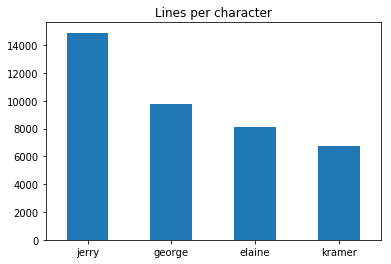

In [38]:
scripts.character_stripped.value_counts().head(4).plot.bar()
plt.xticks(rotation=0)
plt.title("Lines per character")
plt.show()

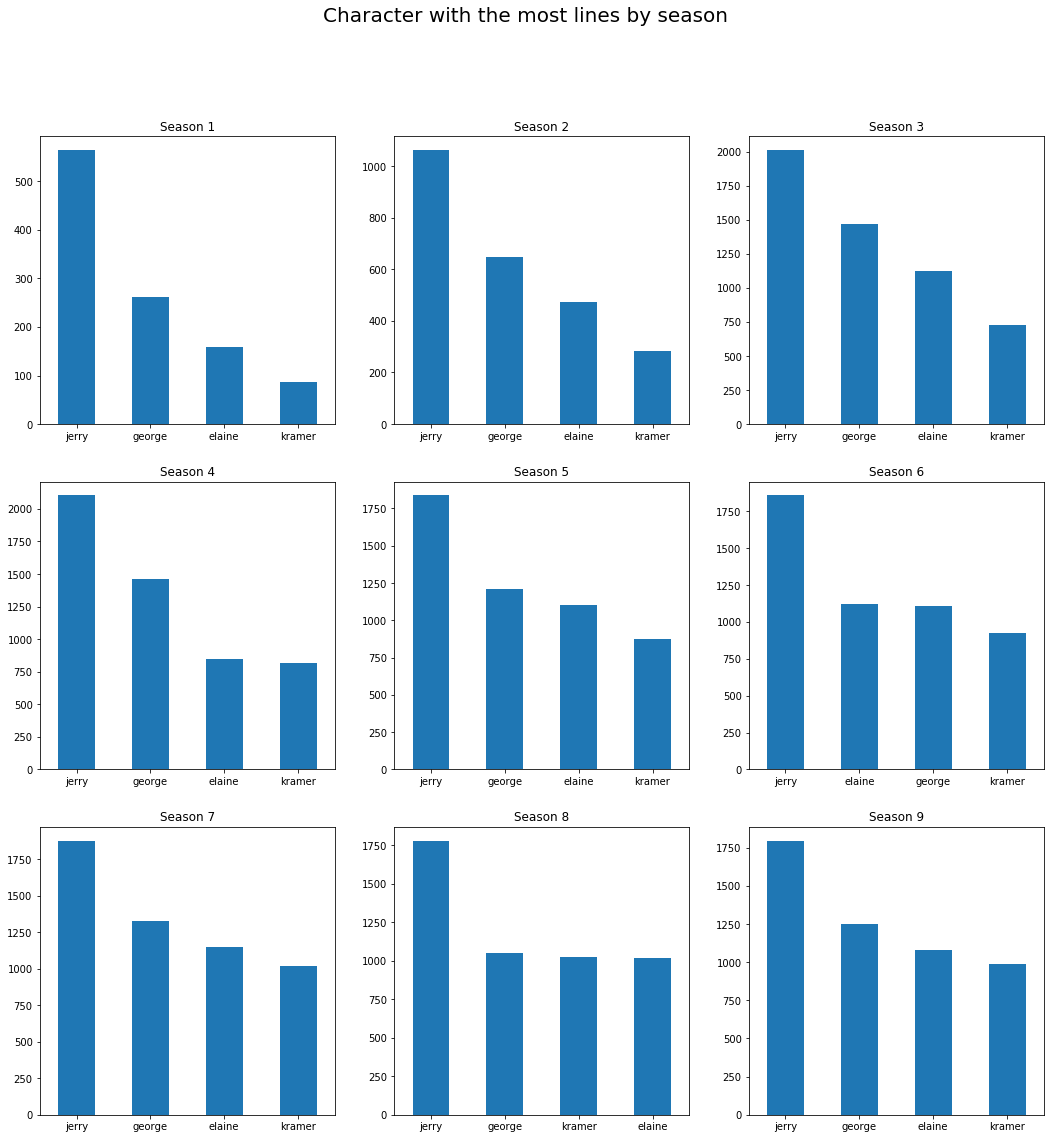

In [39]:
plt.figure(figsize=(18,18))
for season in range(1,10):
    plt.subplot(3,3,season)
    scripts.loc[scripts.Season==season].character_stripped.value_counts().head(4).plot.bar()
    plt.title('Season '+str(season))
    plt.xticks(rotation=0)
plt.suptitle('Character with the most lines by season',size=20)
plt.show()

Jerry has the most lines both overall and in every Season, no wonder the show is named after him. He is consistently followed by George then Elaine then Kramer. Except Season 6 where Elaine narrowly beats George into second place and in Season 8 where kramer beats Elaine for 3rd <br>


While writing their own sitcom pilot Jerry and George remark how difficult it is for them to write for a woman. The Seinfeld writer's room is heavily male dominated but women did write on almost 10% of all episodes. Are female writers more willing to write for a woman?


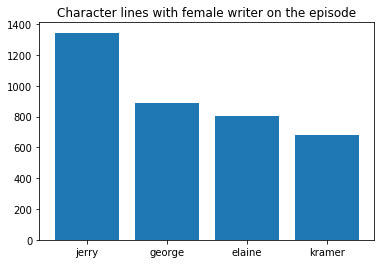

In [40]:
fem_eps=episodes.loc[episodes.has_fem==1]['SEID']

fem_lines={'jerry':0,'george':0,'elaine':0,'kramer':0}
for ep in fem_eps:
    fem_counts=scripts.loc[scripts['SEID']==ep].character_stripped.value_counts()
    fem_lines['jerry']+=fem_counts['jerry']
    fem_lines['george']+=fem_counts['george']
    fem_lines['elaine']+=fem_counts['elaine']
    fem_lines['kramer']+=fem_counts['kramer']


plt.bar(fem_lines.keys(),fem_lines.values())
plt.title('Character lines with female writer on the episode')
plt.show()

Visually it looks very similar to elaine's overall contribution to the show but I'm interested so lets apply some statistical analysis. Using a 2 sided t-test with unequal variance (Welch's t-test) between the number of lines written for elaine in episodes that do and do not have a female writer.<br>
The null hypothesis for this test that having a female writer on  the episode makes no difference to the number of lines written for elaine:<br>
H0: fem_mu == no_fem_mu<br>
H1: fem_mu != no_fem_mu<br>

We will set a p-value threshold of 0.1 to reject the null hypothesis


In [41]:
not_fem=[]
for ep in episodes.SEID:
    if ep not in fem_eps.values:
        not_fem.append(ep)
        
not_fem_elaine=[]
for ep in not_fem:
    nf=scripts.loc[scripts['SEID']==ep].character_stripped.value_counts()
    if 'elaine' in nf.index:
        not_fem_elaine.append(nf['elaine'])
    else:
        not_fem_elaine.append(0)
    
fem_elaine=[]
for ep in fem_eps:
    fe=fem_counts=scripts.loc[scripts['SEID']==ep].character_stripped.value_counts()
    fem_elaine.append(fe['elaine'])
    


In [42]:
from scipy import stats
t_stat, p= stats.ttest_ind(fem_elaine,not_fem_elaine,equal_var=False)
print('T-test p-value :',round(p,2))

T-test p-value : 0.77


The p-value is well above our threshold to reject the null hypothesis that having a female writer results in a greater number of lines written for Elaine

In [43]:
def dialogue_slicer(word):
    #returns dataframe containing all instances of dialogue with keyword=word
    temp_index=[]
    for r,d in scripts.iterrows():
        if word in d[1]:
            temp_index.append(r)
    return scripts.iloc[temp_index]
    

# The Superman

<img src='seinfeld_superman.jpg'>

Jerry Seinfeld is a very well known Superman fan. Legend has it that there is a reference to Superman in every episode. The characters must spend a lot of time talking about Superman

In [44]:
superman=dialogue_slicer('superman')
superman

print(superman.character_stripped.value_counts())

print(superman.SEID.unique())

print('Superman is mentioned {} times across {} episodes. Almost entirely by Jerry and George'.format(len(superman.character_stripped),len(superman.SEID.unique())))

jerry                                                                                                                                                                              11
george                                                                                                                                                                              9
elaine                                                                                                                                                                              3
(elaine decides to make herself at home, opens the refrigerator and starts eating olives out of a jar, with her fingers. in the living room area, kevin is looking at her. note     1
Name: character_stripped, dtype: int64
['S01E04' 'S02E08' 'S04E08' 'S04E15' 'S04E19' 'S04E21' 'S05E06' 'S05E12'
 'S05E14' 'S05E16' 'S06E04' 'S06E10' 'S06E11' 'S06E23' 'S07E07' 'S07E13'
 'S08E03']
Superman is mentioned 24 times across 17 episodes. Almost entirely by Jerry 

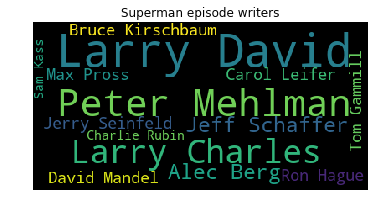

In [45]:
super_dict={}
for writer in writers:
    super_dict[writer]=0
    for ep in superman.SEID.unique():
        if writer in episodes.loc[episodes.SEID==ep]['Writers'].iloc[0]:
            super_dict[writer]+=1

only_super_dict={k:v for k,v in super_dict.items() if v>0}
only_super_dict

wordcloud.fit_words(only_super_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Superman episode writers')
plt.show()

It appears Larry David is the one with the Superman obsession not Jerry Seinfeld!<br>
Read more here on the Superman in Seinfeld myth:<br> https://entertainment.howstuffworks.com/superman-mentioned-every-seinfeld-episode.htm

# The Babies

<img src="baby.gif">

In [46]:
baby=dialogue_slicer('baby')
baby.character_stripped.value_counts().head(4)

elaine    36
jerry     35
george    31
kramer    29
Name: character_stripped, dtype: int64

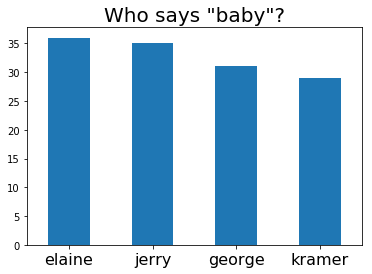

In [49]:
baby.character_stripped.value_counts().head(4).plot.bar()
plt.title('Who says "baby"?',size=20)
plt.xticks(size=16, rotation=0)
plt.show()

**Elaine?!**

In [50]:
baby.SEID.value_counts().head(4)

S05E21    20
S05E05    15
S07E13     7
S03E17     7
Name: SEID, dtype: int64

The two episodes with the most uses of the word 'baby' are Season 5 Episode 21 and Season 5 Episode 5. Both of these episodes actually feature a baby and the characters talk about the baby. Thats not the kind of baby we want, so lets eliminate these episodes from our results

In [51]:
baby.loc[baby['SEID']!='S05E05'].loc[baby['SEID']!='S05E21'].character_stripped.value_counts().head(4)

george    30
jerry     29
elaine    27
kramer    26
Name: character_stripped, dtype: int64

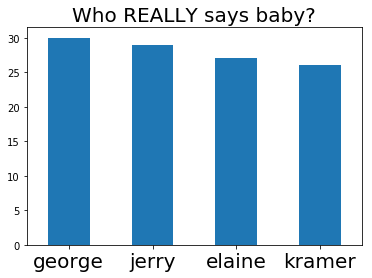

In [52]:
baby.loc[baby['SEID']!='S05E05'].loc[baby['SEID']!='S05E21'].character_stripped.value_counts().head(4).plot.bar()
plt.title('Who REALLY says baby?',size=20)
plt.xticks(size=20, rotation=0)
plt.show()

## George goes right up to first place, baby!

In [53]:
episodes.to_csv('episodes_cleaned.csv')
scripts.to_csv('scripts_cleaned.csv')